# 머신 러닝 기초: 안상호

# 2017년 12월 19일

### Programming Exercise 1 - Linear Regression

## 목차

1. Data load
2. Compute Cost & Gradient Descent
3. Linear Regression with one variable
4. Linear Regression with multiple variables 
5. Exercise

---

### 1. Data load

- 사용 모듈
    + pandas
    + numpy
    + matplotlib


- Data Type
    + pandas DataFrame
    + numpy Array
    
#### 1.1. DataFrame    

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/ex1data1.txt', names=['population', 'profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
df.info()
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


97

`np.c_[]` 는 column 별로 묶어줄 수 있음

- Usage
    + Translates slice objects to concatenation along the second axis.

Text(0,0.5,u'Profit in $10,000s')

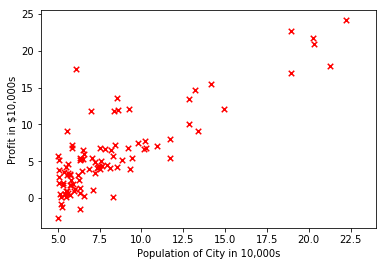

In [5]:
%matplotlib inline

X = np.c_[np.ones(df.shape[0]), df.population.values] 
y = np.c_[df.profit.values]

plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

#### 1.2. Array

In [6]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

Text(0,0.5,u'Profit in $10,000s')

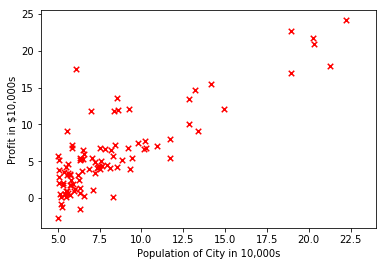

In [7]:
%matplotlib inline

plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

---

### 2. Compute Cost & Gradient Descent

#### 2.1. Compute Cost

+ formula

$$h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

> 즉, 주어진 `theta` 값이 얼마나 많은 Cost를 발생 시키는가?

In [51]:
from __future__ import division

def computeCost(X, y, theta=[[0], [0]]):
    """
    (예측값 - y)^2 계산
    y절편은 1*(theta) 로 해결
    theta = [y절편 가중치, x1 가중치]
    """
    m = y.size ### 데이터 갯수 저장
    theta = np.array(theta)
    J = 0 ### J 초기화
    
    h = X.dot(theta) ### 1*0 + x*0
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [52]:
computeCost(X,y)

32.072733877455676

In [53]:
# X.dot([[2],[1]])
# np.array([[2,1],[1,2]])
np.array([[2,1]]).transpose()

array([[2],
       [1]])

#### 2.2. Gradient Descent

+ formula

$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

**Insight** : J를 구하는 식을 미분한 값을 빼준다 

$$\alpha$$ : learning rate 

+ iteration test


In [54]:
m = y.size
theta = np.array([[0], [0]]) ### 2X1
J_history = np.zeros(1000)

for iter in np.arange(1000):
    h = X.dot(theta) ### 97X1
    theta = theta - 0.02*(1/m)*X.T.dot(h - y) ### 2X97 * 97X1
    J_history[iter] = computeCost(X, y, theta.tolist())
print(J_history)

[ 16.76964237  10.40757975   7.75918348   6.65328753   6.18810582
   5.98908452   5.90065377   5.85819792   5.83487879   5.81954893
   5.80757803   5.79704258   5.78714338   5.7775482    5.76811877
   5.75879735   5.74955971   5.74039548   5.73130008   5.72227135
   5.71330809   5.70440955   5.69557514   5.68680436   5.67809671
   5.66945175   5.660869     5.65234803   5.64388839   5.63548964
   5.62715134   5.61887305   5.61065434   5.60249479   5.59439396
   5.58635144   5.5783668    5.57043964   5.56256952   5.55475605
   5.54699882   5.53929742   5.53165145   5.52406051   5.51652421
   5.50904214   5.50161393   5.49423918   5.48691752   5.47964854
   5.47243189   5.46526718   5.45815403   5.45109208   5.44408096
   5.4371203    5.43020973   5.42334891   5.41653747   5.40977505
   5.4030613    5.39639587   5.38977842   5.38320859   5.37668605
   5.37021046   5.36378147   5.35739876   5.35106198   5.34477082
   5.33852493   5.332324     5.32616769   5.3200557    5.3139877
   5.307963

In [55]:
np.matmul(X.T, X.dot(np.array([[0,0]]).transpose()) - y)

array([[ -566.3961    ],
       [-6336.89842532]])

('theta: ', array([-3.63029144,  1.16636235]))


Text(0.5,0,u'Iterations')

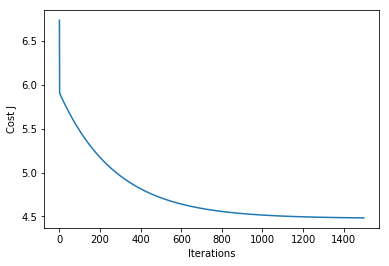

In [56]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    theta = np.array(theta) ### 2X1
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta) ### 97X1
        theta = theta - alpha*(1/m)*X.T.dot(h - y)
        J_history[iter] = computeCost(X, y, theta.tolist())
    return(theta, J_history)

# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y, alpha = 0.01)
print('theta: ',theta.ravel())
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

('theta: ', array([-3.87813769,  1.19126119]))


Text(0.5,0,u'Iterations')

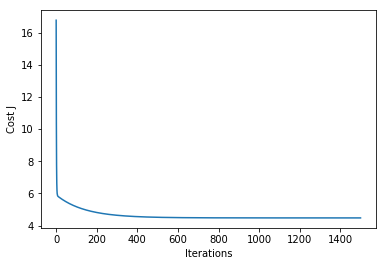

In [57]:
theta2 , Cost_J2 = gradientDescent(X, y, alpha = 0.02, num_iters=1500)
print('theta: ',theta2.ravel())
plt.plot(Cost_J2)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

비교용 octave 코드

```
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters,
  theta = theta - (alpha/m)*(X'*(X*theta-y));
  
  % X'*(X*theta-y) -> (2X97) (97X1)

    % ====================== YOUR CODE HERE ======================
    % Instructions: Perform a single gradient step on the parameter vector
    %               theta. 
    %
    % Hint: While debugging, it can be useful to print out the values
    %       of the cost function (computeCost) and gradient here.
    %







    % ============================================================

    % Save the cost J in every iteration    
    J_history(iter) = computeCost(X, y, theta);

end

end

```

---


### 3. Linear Regression with one variable

Text(0,0.5,u'Profit in $10,000s')

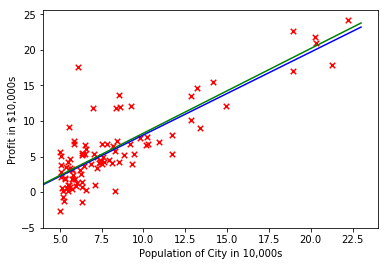

In [58]:
%matplotlib inline

theta , Cost_J = gradientDescent(X, y)
theta2 , Cost_J2 = gradientDescent(X, y, alpha = 0.02)

xi = np.arange(0,24)
line = theta[1]*xi + theta[0]
line2 = theta2[1]*xi + theta[0]

plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot( xi, line, c = 'b')
plt.plot( xi, line2, c = 'g')
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

## With tensorflow

In [21]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

# Data Load
data = np.loadtxt('Week1/data/ex1data1.txt', delimiter=',')

X_data = data[:,0]
y_data = data[:,1]
# X = np.c_[np.ones(data.shape[0]),data[:,0]]
# y = np.c_[data[:,1]]
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([1]), name= 'Weight')
b = tf.Variable(tf.random_normal([1]), name= 'bias')

# Build 

h = W*X + b

cost = tf.reduce_mean(tf.square(h - y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Run
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train, feed_dict= {X: X_data, y: y_data})
    if step % 200 == 0:
        print(step, sess.run(W), sess.run(b), sess.run(cost, feed_dict= {X: X_data, y: y_data}))

(0, array([ 1.38663363], dtype=float32), array([ 1.59673285], dtype=float32), 59.526211)
(200, array([ 0.92869687], dtype=float32), array([-1.26453936], dtype=float32), 10.214553)
(400, array([ 1.06466818], dtype=float32), array([-2.61801338], dtype=float32), 9.2512207)
(600, array([ 1.13069761], dtype=float32), array([-3.27527928], dtype=float32), 9.0240469)
(800, array([ 1.1627624], dtype=float32), array([-3.59445715], dtype=float32), 8.9704742)
(1000, array([ 1.17833352], dtype=float32), array([-3.74945402], dtype=float32), 8.9578419)
(1200, array([ 1.18589509], dtype=float32), array([-3.82472301], dtype=float32), 8.9548626)
(1400, array([ 1.18956721], dtype=float32), array([-3.86127472], dtype=float32), 8.9541597)
(1600, array([ 1.19135022], dtype=float32), array([-3.87902355], dtype=float32), 8.9539938)
(1800, array([ 1.1922164], dtype=float32), array([-3.88764429], dtype=float32), 8.9539547)
(2000, array([ 1.19263673], dtype=float32), array([-3.89183044], dtype=float32), 8.953946

In [22]:
# Run
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

sess.run(h, feed_dict= {X: 6.1101} )

array([ 3.39529896], dtype=float32)

---

### 4. Linear Regression with multiple variables

#### 4.1. one variable

squre, bedrooms, price

In [65]:
data_2 = np.loadtxt('data/ex1data2.txt', delimiter=',')

X_2 = np.c_[np.ones(data_2.shape[0]),data_2[:,0:2]]
y_2 = np.c_[data_2[:,2]]

+ price ~ squre

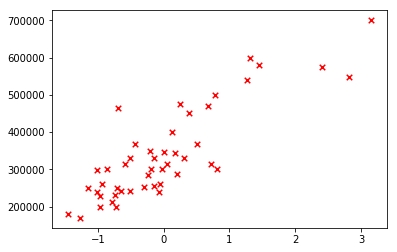

In [76]:
# print(gradientDescent(X_2[:,0:2], y_2, alpha = 0.01))

plt.scatter(X_2[:,1], y_2, s=30, c='r', marker='x', linewidths=1)
# plt.xlim(4,24)

+ price ~ bedrooms

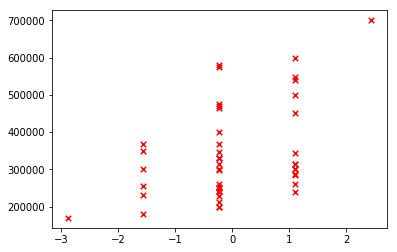

In [75]:
plt.scatter(X_2[:,2], y_2, s=30, c='r', marker='x', linewidths=1)

#### 4.2. Feature Normalization

In [78]:
def FeatureNorm(X):
    return (X - X.mean())/(X.std())
    
X_2[:,1] = FeatureNorm(X_2[:,1])
y_2 = FeatureNorm(y_2)
# FeatureNorm(X_2[:,1])

('theta: ', array([ -1.08099109e-16,   8.32902280e-01,  -1.63557870e-03]))


Text(0.5,0,u'Iterations')

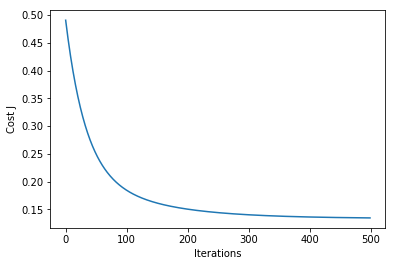

In [82]:
theta_2, Cost_J_2 = gradientDescent(X_2, y_2, theta=[[0],[0],[0]], alpha = 0.01, num_iters=500)
print('theta: ',theta_2.ravel())
plt.plot(Cost_J_2)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

In [81]:
# computeCost(X_2, y_2, theta_2)
Cost_J_2

array([ 0.49080152,  0.48186894,  0.47319419, ...,  0.13352767,
        0.13352767,  0.13352766])

In [173]:
X_2[:,1].mean()

# theta[]

-1.1810883240693154e-18

In [77]:
X_2

array([[ 340412.56301439],
       [ 109370.05670466],
       [  -6500.61509507]])

#### 4.3. Multi-Variables Regression with FeatureNorm

('theta: ', array([ -8.24222487e-17,   8.84137547e-01,  -5.25503786e-02]))
[[  1.00000000e+00   1.31415422e-01  -2.26093368e-01]
 [  1.00000000e+00  -5.09640698e-01  -2.26093368e-01]
 [  1.00000000e+00   5.07908699e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.43677059e-01  -1.55439190e+00]
 [  1.00000000e+00   1.27107075e+00   1.10220517e+00]
 [  1.00000000e+00  -1.99450507e-02   1.10220517e+00]
 [  1.00000000e+00  -5.93588523e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.29685755e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.89466782e-01  -2.26093368e-01]
 [  1.00000000e+00  -6.44465993e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.71822042e-02   1.10220517e+00]
 [  1.00000000e+00  -8.65999486e-04  -2.26093368e-01]
 [  1.00000000e+00  -1.40779041e-01  -2.26093368e-01]
 [  1.00000000e+00   3.15099326e+00   2.43050370e+00]
 [  1.00000000e+00  -9.31923697e-01  -2.26093368e-01]
 [  1.00000000e+00   3.80715024e-01   1.10220517e+00]
 [  1.00000000e+00  -8.65782986e-01  -1.55439190e+00]
 [  1.0

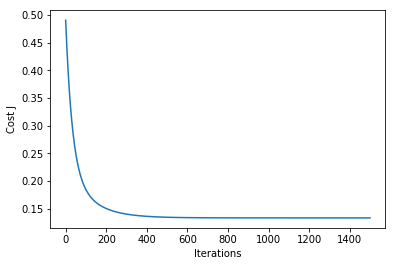

In [118]:
data_2 = np.loadtxt('data/ex1data2.txt', delimiter=',')

X_2 = np.c_[np.ones(data_2.shape[0]),data_2[:,0:2]]
y_2 = np.c_[data_2[:,2]]

def gradientDescentM(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    
    def FeatureNorm(X):
        return (X - X.mean())/(X.std())
    
    y = FeatureNorm(y)
    for i in range(1, X.shape[1]):
        X[:,i] = FeatureNorm(X[:,i])
    
    
    m = y.size
    theta = np.array(theta) ### 2X1
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta) ### 97X1
        theta = theta - alpha*(1/m)*X.T.dot(h - y)
        J_history[iter] = computeCost(X, y, theta.tolist())
    return(theta, J_history)

# theta for minimized cost J
theta_2, Cost_J_2 = gradientDescentM(X_2, y_2, theta=[[0],[0],[0]], alpha = 0.01)
print('theta: ',theta_2.ravel())
plt.plot(Cost_J_2)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

- 값 예측 함수

In [116]:
# def FeatureNorm(X):
#     return (X - X.mean())/(X.std())

def predictM(X, trainX, theta = [[0], [0], [0] ]):
    
    for i in range(1, X.shape[1]):
        X[:,i] = (X[:,i] - trainX[:,i].mean())/trainX[:,i].std()
    return X

#     return X.dot(np.array(theta))



a = predictM(np.array([[1, 2000, 3]]), trainX= X_2, theta = theta_2).tolist()
a
# (a*y_2.std()) + y_2.mean() 

[[1, 2000, 3]]

In [103]:
print(y_2.std())
print(y_2.mean())
predictM(np.array([[1, 2000, 3]]), theta = theta_2).tolist()[0][0]

123702.536006
340412.659574


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


-7.667082051545176e+18

In [117]:
X_2

array([[  1.00000000e+00,   1.31415422e-01,  -2.26093368e-01],
       [  1.00000000e+00,  -5.09640698e-01,  -2.26093368e-01],
       [  1.00000000e+00,   5.07908699e-01,  -2.26093368e-01],
       [  1.00000000e+00,  -7.43677059e-01,  -1.55439190e+00],
       [  1.00000000e+00,   1.27107075e+00,   1.10220517e+00],
       [  1.00000000e+00,  -1.99450507e-02,   1.10220517e+00],
       [  1.00000000e+00,  -5.93588523e-01,  -2.26093368e-01],
       [  1.00000000e+00,  -7.29685755e-01,  -2.26093368e-01],
       [  1.00000000e+00,  -7.89466782e-01,  -2.26093368e-01],
       [  1.00000000e+00,  -6.44465993e-01,  -2.26093368e-01],
       [  1.00000000e+00,  -7.71822042e-02,   1.10220517e+00],
       [  1.00000000e+00,  -8.65999486e-04,  -2.26093368e-01],
       [  1.00000000e+00,  -1.40779041e-01,  -2.26093368e-01],
       [  1.00000000e+00,   3.15099326e+00,   2.43050370e+00],
       [  1.00000000e+00,  -9.31923697e-01,  -2.26093368e-01],
       [  1.00000000e+00,   3.80715024e-01,   1.1022051

In [90]:
df_2 = pd.read_csv('data/ex1data2.txt', names=['squre', 'bedrooms', 'price'])
df_2.head()

,squre,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [60]:
import tensorflow as tf

raw_data = pd.read_csv('data/ex1data2.txt', names=['square', 'bedrooms', 'price'])
# data = general.normalize_feature(raw_data)
raw_data.head()
# raw_data.shape[1]
data = pd.DataFrame()
for i in range(0, raw_data.shape[1]):
    data[raw_data.columns[i]] = (raw_data.iloc[:,i] - raw_data.iloc[:,i].mean())/raw_data.iloc[:,i].std()
#     print(data)
print(data.shape)
data.head()

(47, 3)


,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [61]:
X_data = np.c_[np.ones(data.shape[0]),data.iloc[:,0:2]]
# print(X_data)

y_data = np.c_[data.iloc[:,2]]
# print(y_data)

#### Ploting

NameError: name 'results' is not defined

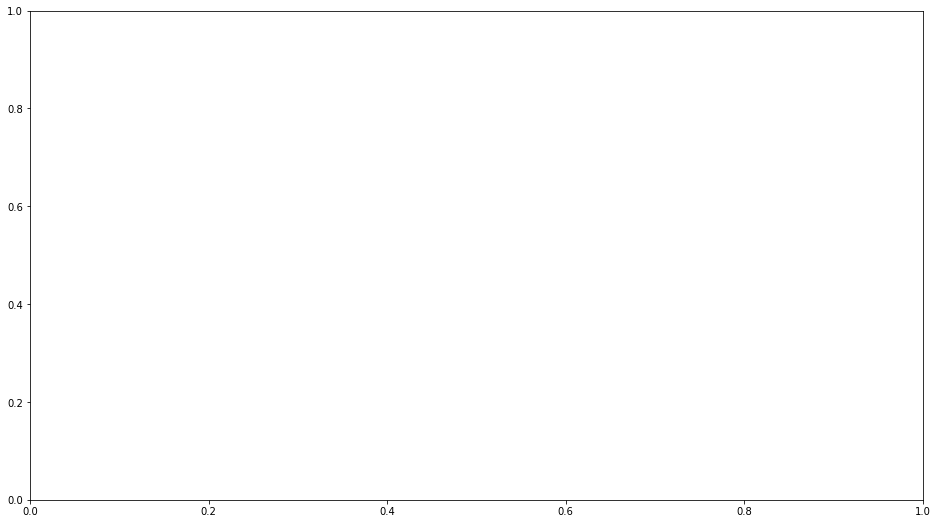

In [62]:
fig, ax = plt.subplots(figsize=(16, 9))

for res in results: 
    loss_data = res['loss']
    
#     print('for optimizer {}'.format(res['name']))
#     print('final parameters\n', res['parameters'])
#     print('final loss={}\n'.format(loss_data[-1]))
    ax.plot(np.arange(len(loss_data)), loss_data, label=res['name'])

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('different optimizer', fontsize=18)

## With Tensorflow

In [26]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

# Data Load
data = np.loadtxt('Week1/data/ex1data2.txt', delimiter=',')

X_data = data[:,0:-1]
y_data = data[:,[-1]] 
# y_data = data[:,-1] 차이는 47로 구성된 벡터냐, 아니면 47X1 행렬이냐
print(X_data.shape, y_data.shape)
# print(X_data)

((47, 2), (47, 1))


In [27]:
X_data[:,0].min()

852.0

In [28]:
from __future__ import division

def FeatureScale(data):
    data_shape = data.shape
    data_mean, data_std = [], []

    data_norm = np.zeros(data_shape)   
    for i in range(data_shape[1]):
        data_i = data[:,i]
        m = data_i.mean()
        s = data_i.std()
        
        data_norm[:,i] = (data_i - m)/(s)
        data_mean.append(m)
        data_std.append(s)
        
    return data_norm, data_mean, data_std

# (X_data - X_data.mean())/X_data.std()
X_norm, X_mean, X_std = FeatureScale(X_data)
y_norm, y_mean, y_std = FeatureScale(y_data)

In [29]:
X = tf.placeholder(tf.float32, shape = [None, 2])
y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name= 'Weight')
b = tf.Variable(tf.random_normal([1]), name= 'bias')

# Build 

h = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(h - y))
# 3e-3
# 1e-10
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [35]:
# Run
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train, feed_dict= {X: X_norm, y: y_norm})
    if step % 20 == 0:
        print("\n\nStep: {}\n Weight: {} bias: {} cost: {}".format(step, sess.run(W), sess.run(b), sess.run(cost, feed_dict= {X: X_norm, y: y_norm})))



Step: 0
 Weight: [[-0.57527775]
 [-1.18508995]] bias: [ 0.5664376] cost: 5.85170555115


Step: 20
 Weight: [[ 0.05976503]
 [-0.60321969]] bias: [ 0.37815824] cost: 1.90143883228


Step: 40
 Weight: [[ 0.40483159]
 [-0.30270937]] bias: [ 0.2524614] cost: 0.757515609264


Step: 60
 Weight: [[ 0.59474021]
 [-0.15013689]] bias: [ 0.16854523] cost: 0.420471221209


Step: 80
 Weight: [[ 0.70122677]
 [-0.0749361 ]] bias: [ 0.11252213] cost: 0.31834846735


Step: 100
 Weight: [[ 0.76252782]
 [-0.03985121]] bias: [ 0.07512068] cost: 0.285993367434


Step: 120
 Weight: [[ 0.79907846]
 [-0.02526863]] bias: [ 0.05015116] cost: 0.27501308918


Step: 140
 Weight: [[ 0.82184571]
 [-0.02090956]] bias: [ 0.03348131] cost: 0.270902335644


Step: 160
 Weight: [[ 0.83675349]
 [-0.02142683]] bias: [ 0.02235239] cost: 0.269160687923


Step: 180
 Weight: [[ 0.84703344]
 [-0.02407247]] bias: [ 0.01492263] cost: 0.268318593502


Step: 200
 Weight: [[ 0.85447389]
 [-0.02746298]] bias: [ 0.00996247] cost: 0.26



Step: 1760
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.49131409e-08] cost: 0.267054975033


Step: 1780
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.49876449e-08] cost: 0.267054975033


Step: 1800
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.48013779e-08] cost: 0.267054975033


Step: 1820
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.48758819e-08] cost: 0.267054975033


Step: 1840
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.49503840e-08] cost: 0.267054975033


Step: 1860
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.47641170e-08] cost: 0.267054975033


Step: 1880
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.48386210e-08] cost: 0.267054975033


Step: 1900
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.49131232e-08] cost: 0.267054975033


Step: 1920
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.49876271e-08] cost: 0.267054975033


Step: 1940
 Weight: [[ 0.88476378]
 [-0.05317748]] bias: [ -1.48013601e-08] cost: 0.267054975033


Step: 19

#### Prediction

In [36]:
# Build

X_test = np.array([[2104, 3]])
X_test= (X_test- X_mean)/X_std
print(X_test)

[[ 0.13141542 -0.22609337]]


In [37]:
# Run
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
print(sess.run(h, feed_dict= {X: X_test} ), sess.run(W))

(array([[ 0.12829466]], dtype=float32), array([[ 0.88476378],
       [-0.05317748]], dtype=float32))


In [38]:
prediction = 0.12829466*y_std[0] + y_mean[0]

# prediction - 399900
prediction

356283.03437251452

In [70]:
import numpy as np

data_2 = np.loadtxt('data/ex1data2.txt', delimiter=',')

x_data = np.c_[np.ones(data_2.shape[0]),data_2[:,0:2]]
y_data = np.c_[data_2[:,2]]
print(x_data[1:3])
x_inv = np.linalg.pinv(x_data)

theta = x_inv.dot(y_data)
theta

[[  1.00000000e+00   1.60000000e+03   3.00000000e+00]
 [  1.00000000e+00   2.40000000e+03   3.00000000e+00]]


array([[ 89597.9095428 ],
       [   139.21067402],
       [ -8738.01911233]])

In [65]:
np.array([[1, 2104, 3]]).dot(theta)

array([[ 356283.1103389]])